**Module 1 :**  2.1_tools_messages.ipynb,  2.2_chains_reducers.ipynb

[Class-02: Mastering LangGraph In a New Way: LLM with Tool Calling, Chains & Reducers - Nov 9, 2024 ](https://www.youtube.com/watch?v=g1GqJx2k1Hk)

# LLM Actions and Structure Messages

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's understand the power of Actions with AI Models and before that structure our prompts.

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation.

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`.

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call.

Let's create a list of messages.

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Raheela"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Raheela"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Raheela

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Raheela

I want to learn about the best place to see Orcas in the US.


From now let's use HumanMessage to pass our Prompt to Model

In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')


In [ ]:
%pip install --quiet -U langchain-google-genai

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

In [ ]:
simple_call = llm.invoke("Hi")
print(simple_call)

content='Hi there! What can I do for you today? \n' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-dad98fc3-6a60-4a45-b9a9-1841f230c669-0' usage_metadata={'input_tokens': 2, 'output_tokens': 12, 'total_tokens': 14, 'input_token_details': {'cache_read': 0}}


In [ ]:
messages = [HumanMessage(content="What is your name?")]
result = llm.invoke(messages)
print(result)

content="I am a large language model, trained by Google. I don't have a name. \n" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-82157497-247f-4e68-8705-d937fa5ab443-0' usage_metadata={'input_tokens': 6, 'output_tokens': 19, 'total_tokens': 25, 'input_token_details': {'cache_read': 0}}


In [ ]:
system_human_message = [
                SystemMessage(content="You are a helpful assistant! Your name is Bushra."),
                HumanMessage(content="What is your name?")
            ]
result = llm.invoke(system_human_message)
print(result)



content="Hi! My name is Bushra. 😊  It's nice to meet you! How can I help you today? \n" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-95babd13-676f-4276-a291-5dcba4f847de-0' usage_metadata={'input_tokens': 18, 'output_tokens': 25, 'total_tokens': 43, 'input_token_details': {'cache_read': 0}}


In [ ]:
context_call = llm.invoke(messages)
print(context_call)

content="I am a large language model, so I don't have a name. You can call me Bard, or anything you like! \n" additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-e573be8e-0a14-4574-b31a-0130bbbe4c10-0' usage_metadata={'input_tokens': 6, 'output_tokens': 27, 'total_tokens': 33, 'input_token_details': {'cache_read': 0}}


## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language.

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user.

And, it will return an output that adheres to the tool's schema.

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple.

You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain-google-genai langchain_core langgraph

In [ ]:
from google.colab import userdata
gemini_api_key = userdata.get('GEMINI_API_KEY')


In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=gemini_api_key)

## Tool Calling

**rm note**

**`llm_with_tools = llm.bind_tools([deposit_money_function])`**

```bash
def call_llm(state: LastMessageState):
  messages = state["messages"]
  call_response = llm_with_tools.invoke(messages)
  return {"messages": [call_response]}
```

```bash
from langchain_core.messages import HumanMessage
call = llm_with_tools.invoke(
    [HumanMessage(content=f"Hi  how are you ?", name="Ahmad")])
call
```



In [ ]:
print("\n\nllm\n", llm, "\n\n\n")



llm
 model='models/gemini-1.5-flash' google_api_key=SecretStr('**********') client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7cfd112c9ba0> default_metadata=() 





In [ ]:
def deposit_money(name: str, bank_account_no: int, amount:int) -> str:
    """Deposit Money in Bank account.

    Args:
        name: bnak account holder name
        bank_account_no: account id
        amount: amount to be deposited
    Return:
        str: deposit status
    """
    # BUSINESS LOGIC for Bank Deposit
    # ......
    return {"status": f"$ {amount} Successfully deposit in {name}'s Account"}

In [ ]:
deposit_money(name="Raheela", bank_account_no=232323233322, amount=1000)   # call function

{'status': "$ 1000 Successfully deposit in Raheela's Account"}

In [ ]:
# note:- llm has support of tool calling
# bind tool with llm and pass function
llm_with_tools = llm.bind_tools([deposit_money])

In [ ]:
#print(llm_with_tools)

bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7cfd112c9ba0>, default_metadata=()) kwargs={'tools': [{'type': 'function', 'function': {'name': 'deposit_money', 'description': 'Deposit Money in Bank account.', 'parameters': {'properties': {'name': {'description': 'first str', 'type': 'string'}, 'bank_account_no': {'description': 'second int', 'type': 'integer'}, 'amount': {'description': 'thrid int', 'type': 'integer'}}, 'required': ['name', 'bank_account_no', 'amount'], 'type': 'object'}}}]} config={} config_factories=[]


In [ ]:
llm_with_tools

RunnableBinding(bound=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x7cfd112c9ba0>, default_metadata=()), kwargs={'tools': [{'type': 'function', 'function': {'name': 'deposit_money', 'description': 'Deposit Money in Bank account.', 'parameters': {'properties': {'name': {'description': 'first str', 'type': 'string'}, 'bank_account_no': {'description': 'second int', 'type': 'integer'}, 'amount': {'type': 'integer'}}, 'required': ['name', 'bank_account_no', 'amount'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [ ]:
from langchain_core.messages import HumanMessage

In [ ]:
# llm without tool
call = llm.invoke(
    [HumanMessage(content=f"Deposit Money in Ahmad Account. His acc number is 00123", name="Muhammad")])
call


AIMessage(content="I understand you want to deposit money into Ahmad's account, but I need more information to help you. Please tell me:\n\n* **How much money do you want to deposit?**\n* **What is the name of the bank or financial institution where Ahmad's account is held?**\n* **What is the currency of the deposit?**\n* **Do you have access to online banking for this account?**\n* **Are you able to physically go to a bank branch to make the deposit?**\n\nOnce I have this information, I can provide you with more specific instructions on how to proceed. \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 

In [ ]:
# llm with tool
call = llm_with_tools.invoke(
    [HumanMessage(content=f"Deposit Money in Ahmad Account. His acc number is 00123", name="Muhammad")])
call

AIMessage(content='How much money you would like to deposit? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-cfc9aa2f-6254-454f-82da-1fdd7b7e2c48-0', usage_metadata={'input_tokens': 89, 'output_tokens': 9, 'total_tokens': 98, 'input_token_details': {'cache_read': 0}})

In [ ]:
# llm with tool but not calling function
call = llm_with_tools.invoke(
    [HumanMessage(content=f"Hi  how are you ?", name="Ahmad")])
call

AIMessage(content="I am an AI language model, so I don't have feelings. But I am here to assist you. What can I do for you today? \n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-a29fbf69-b66f-4650-b28f-10cde31ae16d-0', usage_metadata={'input_tokens': 79, 'output_tokens': 31, 'total_tokens': 110, 'input_token_details': {'cache_read': 0}})

### Building Graph

Important things in Graph

State, Nodes, Edges

In [ ]:
# We have an LLM Capable of Tool Calling: using bind_tools

# Now Lets do the Orchestration Through LangGraph

# 0.  State

from typing_extensions import TypedDict

class LastMessageState(TypedDict):
  messages: list  # state  overwrite

# 1. tool calling llm ki Node

def call_llm(state: LastMessageState):
  messages = state["messages"]
  call_response = llm_with_tools.invoke(messages)
  # messages.append(call_response)

  # return {"messages": messages}
  return {"messages": [call_response]}

In [ ]:
# 2. Graph

from langgraph.graph import StateGraph, START, END

builder: StateGraph = StateGraph(LastMessageState)

# define nodes
builder.add_node("call_llm_with_tools", call_llm)

# define edges
builder.add_edge(START, "call_llm_with_tools")
builder.add_edge("call_llm_with_tools", END)

# build graph
graph = builder.compile()


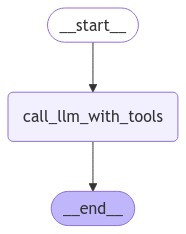

In [ ]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"messages": [HumanMessage(content="Hi")]})

{'messages': [AIMessage(content='Hello! How can I help you today? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-cc57069f-6a3e-4526-af39-b4fb8399c1d9-0', usage_metadata={'input_tokens': 79, 'output_tokens': 9, 'total_tokens': 88})]}

In [ ]:
graph.invoke({"messages": [HumanMessage(content="Deposit 7000 in Ahmad Account - his bank num is 001")]})

{'messages': [AIMessage(content='', additional_kwargs={'function_call': {'name': 'deposit_money', 'arguments': '{"bank_account_no": 1.0, "name": "Ahmad"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-97f74524-ff40-4957-847f-49602dd14140-0', tool_calls=[{'name': 'deposit_money', 'args': {'bank_account_no': 1.0, 'name': 'Ahmad'}, 'id': '66818e6d-f603-428f-9953-4c8645b44a2b', 'type': 'tool_call'}], usage_metadata={'input_tokens': 98, 'output_tokens': 24, 'total_tokens': 122})]}

#### Current Flow

- LLM: Call this Tool
- System: Called Tool and told LLM the result.

#### Issue ??: Where is my Human Message

Right now in response we only have AIMessage

#### Solutions:

- Proposal 1: manually Add Messages in call_llm using llm
- Proposal 2: Reducer Functions to Keep History Context